In [ ]:
#hellooooooooooo

In [3]:
from __future__ import print_function
import psutil
print('cpu % used:',psutil.cpu_percent())
print(psutil.virtual_memory())  # physical memory usage
print('memory % used:', psutil.virtual_memory()[2])

cpu % used: 8.7
svmem(total=17039618048, available=9611739136, percent=43.6, used=7427878912, free=9611739136)
memory % used: 43.6


In [1]:
import tkinter as tk
from tkinter import ttk

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from matplotlib import style
import matplotlib.dates as mdates
from psutil import cpu_percent
from datetime import datetime, timedelta

RANDOM_STATE = 42 #used to help randomly select the data points
low_memory = False
LARGE_FONT = ("Verdana", 12)
style.use("ggplot")

class Analyticsapp(tk.Tk):

    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self, *args, **kwargs)
        #tk.Tk.iconbitmap(self, default="iconimage_kmeans.ico") #Icon for program
        tk.Tk.wm_title(self, "Advanched analytics")

        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}

        for F in (StartPage, GraphPage):
            frame = F(container, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame(StartPage)

    def show_frame(self, cont):
        frame = self.frames[cont]
        frame.tkraise()

class StartPage(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Advanched analytics", font=LARGE_FONT)
        label.pack(pady=10, padx=10)

        button3 = ttk.Button(self, text="Live Plot",
                             command=lambda: controller.show_frame(GraphPage))
        button3.pack(fill='x')

class GraphPage(tk.Frame):

    def __init__(self, parent, controller, nb_points=360):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Example of Live Plotting", font=LARGE_FONT)
        label.pack(pady=10, padx=10, side='top')

        # matplotlib figure
        self.figure = Figure(figsize=(5, 5), dpi=100)
        self.ax = self.figure.add_subplot(111)
        # format the x-axis to show the time
        myFmt = mdates.DateFormatter("%H:%M:%S")
        self.ax.xaxis.set_major_formatter(myFmt)
        # initial x and y data
        dateTimeObj = datetime.now() + timedelta(seconds=-nb_points)
        self.x_data = [dateTimeObj + timedelta(seconds=i) for i in range(nb_points)]
        self.y_data = [0 for i in range(nb_points)]
        # create the plot
        self.plot = self.ax.plot(self.x_data, self.y_data, label='CPU')[0]
        self.ax.set_ylim(0, 100)
        self.ax.set_xlim(self.x_data[0], self.x_data[-1])

        self.canvas = FigureCanvasTkAgg(self.figure, self)

        toolbar = NavigationToolbar2Tk(self.canvas, self)
        toolbar.update()

        button1 = ttk.Button(self, text="Back",
                             command=lambda: controller.show_frame(StartPage))
        button1.pack(side='bottom')
        self.canvas.get_tk_widget().pack(side='top', fill=tk.BOTH, expand=True)
        self.animate()

    def animate(self):
        # append new data point to the x and y data
        self.x_data.append(datetime.now())
        self.y_data.append(cpu_percent())
        # remove oldest data point
        self.x_data = self.x_data[1:]
        self.y_data = self.y_data[1:]
        #  update plot data
        self.plot.set_xdata(self.x_data)
        self.plot.set_ydata(self.y_data)
        self.ax.set_xlim(self.x_data[0], self.x_data[-1])
        self.canvas.draw_idle()  # redraw plot
        self.after(1000, self.animate)  # repeat after 1s

app = Analyticsapp()
app.geometry('500x400')
app.mainloop()

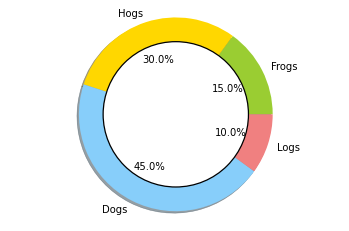

In [7]:
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

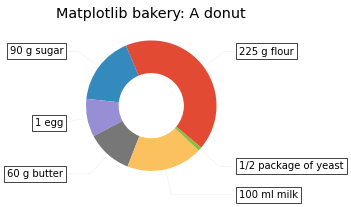

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

In [2]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install jupyter-dash

Processing c:\users\misa\appdata\local\pip\cache\wheels\33\6f\03\094db0f27625579ae1ae85fb385dedc7e3dc6d8de8cd6146f7\dash-1.18.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc 
import dash_html_components as html

from pandas_datareader import data as web 
from datetime import datetime as dt

app = dash.Dash('Hello World',
                external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])

app.layout = html.Div([
    dcc.Dropdown(
        id='my-dropdown',
        options=[
            {'label': 'Coke', 'value': 'COKE'},
            {'label': 'Tesla', 'value': 'TSLA'},
            {'label': 'Apple', 'value': 'AAPL'}
        ],  
        value='COKE'
    ),  
    dcc.Graph(id='my-graph')
], style={'width': '500'})

@app.callback(Output('my-graph', 'figure'), [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown_value):
    df = web.DataReader(
        selected_dropdown_value,
        'yahoo',
        dt(2017, 1, 1), 
        dt.now()
    )   
    return {
        'data': [{
            'x': df.index,
            'y': df.Close
        }], 
        'layout': {'margin': {'l': 40, 'r': 0, 't': 20, 'b': 30}}
    }   

if __name__ == '__main__':
    app.run_server()
    

ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
pip install pandas

In [2]:
pip install pandas-datareader

In [3]:
pip install pysimplegui

In [1]:
import PySimpleGUI as sg
import psutil
import sys
import math

"""
    Another simple Desktop Widget using PySimpleGUI
    This time a CPU Usage indicator using a custom Gauge element
    
    The Gauge class was developed by the brilliant PySimpleGUI user and support-helper @jason990420 
    It has been hacked on a bit, had classes and functions moved around.  It could be cleaned up some
    but it's "good enough" at this point to release as a demo.
    
    This is a good example of how you can use Graph Elements to create your own custom elements.
    This Gauge element is created from a Graph element. 
    Copyright 2020 PySimpleGUI.org
"""

class Gauge():
    def mapping(func, sequence, *argc):
        """
        Map function with extra argument, not for tuple.
        : Parameters
          func - function to call.
          sequence - list for iteration.
          argc - more arguments for func.
        : Return
          list of func(element of sequence, *argc)
        """
        if isinstance(sequence, list):
            return list(map(lambda i: func(i, *argc), sequence))
        else:
            return func(sequence, *argc)

    def add(number1, number2):
        """
        Add two number
        : Parameter
          number1 - number to add.
          numeer2 - number to add.
        : Return
          Addition result for number1 and number2.
        """
        return number1 + number1

    def limit(number):
        """
        Limit angle in range 0 ~ 360
        : Parameter
          number: angle degree.
        : Return
          angel degree in 0 ~ 360, return 0 if number < 0, 360 if number > 360.
        """
        return max(min(360, number), 0)
    class Clock():
        """
        Draw background circle or arc
        All angles defined as clockwise from negative x-axis.
        """

        def __init__(self, center_x=0, center_y=0, radius=100, start_angle=0,
                     stop_angle=360, fill_color='white', line_color='black', line_width=2, graph_elem=None):

            instance = Gauge.mapping(isinstance, [center_x, center_y, radius, start_angle,
                                            stop_angle, line_width], (int, float)) + Gauge.mapping(isinstance,
                                                                                             [fill_color, line_color], str)
            if False in instance:
                raise ValueError
            start_angle, stop_angle = Gauge.limit(start_angle), Gauge.limit(stop_angle)
            self.all = [center_x, center_y, radius, start_angle, stop_angle,
                        fill_color, line_color, line_width]
            self.figure = []
            self.graph_elem = graph_elem
            self.new()

        def new(self):
            """
            Draw Arc or circle
            """
            x, y, r, start, stop, fill, line, width = self.all
            start, stop = (180 - start, 180 - stop) if stop < start else (180 - stop, 180 - start)
            if start == stop % 360:
                self.figure.append(self.graph_elem.DrawCircle((x, y), r, fill_color=fill,
                                                              line_color=line, line_width=width))
            else:
                self.figure.append(self.graph_elem.DrawArc((x - r, y + r), (x + r, y - r), stop - start,
                                                           start, style='arc', arc_color=fill))

        def move(self, delta_x, delta_y):
            """
            Move circle or arc in clock by delta x, delta y
            """
            if False in Gauge.mapping(isinstance, [delta_x, delta_y], (int, float)):
                raise ValueError
            self.all[0] += delta_x
            self.all[1] += delta_y
            for figure in self.figure:
                self.graph_elem.MoveFigure(figure, delta_x, delta_y)

    class Pointer():
        """
        Draw pointer of clock
        All angles defined as clockwise from negative x-axis.
        """

        def __init__(self, center_x=0, center_y=0, angle=0, inner_radius=20,
                     outer_radius=80, outer_color='white', pointer_color='blue',
                     origin_color='black', line_width=2, graph_elem=None):

            instance = Gauge.mapping(isinstance, [center_x, center_y, angle, inner_radius,
                                            outer_radius, line_width], (int, float)) + Gauge.mapping(isinstance,
                                                                                               [outer_color, pointer_color, origin_color], str)
            if False in instance:
                raise ValueError

            self.all = [center_x, center_y, angle, inner_radius, outer_radius,
                        outer_color, pointer_color, origin_color, line_width]
            self.figure = []
            self.stop_angle = angle
            self.graph_elem = graph_elem
            self.new(degree=angle)

        def new(self, degree=0):
            """
            Draw new pointer by angle, erase old pointer if exist
            degree defined as clockwise from negative x-axis.
            """
            (center_x, center_y, angle, inner_radius, outer_radius,
             outer_color, pointer_color, origin_color, line_width) = self.all
            if self.figure != []:
                for figure in self.figure:
                    self.graph_elem.DeleteFigure(figure)
                self.figure = []
            d = degree - 90
            self.all[2] = degree
            dx1 = int(2 * inner_radius * math.sin(d / 180 * math.pi))
            dy1 = int(2 * inner_radius * math.cos(d / 180 * math.pi))
            dx2 = int(outer_radius * math.sin(d / 180 * math.pi))
            dy2 = int(outer_radius * math.cos(d / 180 * math.pi))
            self.figure.append(self.graph_elem.DrawLine((center_x - dx1, center_y - dy1),
                                                        (center_x + dx2, center_y + dy2),
                                                        color=pointer_color, width=line_width))
            self.figure.append(self.graph_elem.DrawCircle((center_x, center_y), inner_radius,
                                                          fill_color=origin_color, line_color=outer_color, line_width=line_width))

        def move(self, delta_x, delta_y):
            """
            Move pointer with delta x and delta y
            """
            if False in Gauge.mapping(isinstance, [delta_x, delta_y], (int, float)):
                raise ValueError
            self.all[:2] = [self.all[0] + delta_x, self.all[1] + delta_y]
            for figure in self.figure:
                self.graph_elem.MoveFigure(figure, delta_x, delta_y)

    class Tick():
        """
        Create tick on click for minor tick, also for major tick
        All angles defined as clockwise from negative x-axis.
        """

        def __init__(self, center_x=0, center_y=0, start_radius=90, stop_radius=100,
                     start_angle=0, stop_angle=360, step=6, line_color='black', line_width=2, graph_elem=None):

            instance = Gauge.mapping(isinstance, [center_x, center_y, start_radius,
                                            stop_radius, start_angle, stop_angle, step, line_width],
                               (int, float)) + [Gauge.mapping(isinstance, line_color, (list, str))]
            if False in instance:
                raise ValueError
            start_angle, stop_angle = Gauge.limit(start_angle), Gauge.limit(stop_angle)
            self.all = [center_x, center_y, start_radius, stop_radius,
                        start_angle, stop_angle, step, line_color, line_width]
            self.figure = []
            self.graph_elem = graph_elem

            self.new()

        def new(self):
            """
            Draw ticks on clock
            """
            (x, y, start_radius, stop_radius, start_angle, stop_angle, step,
             line_color, line_width) = self.all
            start_angle, stop_angle = (180 - start_angle, 180 - stop_angle
                                       ) if stop_angle < start_angle else (180 - stop_angle, 180 - start_angle)
            for i in range(start_angle, stop_angle + 1, step):
                start_x = x + start_radius * math.cos(i / 180 * math.pi)
                start_y = y + start_radius * math.sin(i / 180 * math.pi)
                stop_x = x + stop_radius * math.cos(i / 180 * math.pi)
                stop_y = y + stop_radius * math.sin(i / 180 * math.pi)
                self.figure.append(self.graph_elem.DrawLine((start_x, start_y),
                                                            (stop_x, stop_y), color=line_color, width=line_width))

        def move(self, delta_x, delta_y):
            """
            Move ticks by delta x and delta y
            """
            if False in Gauge.mapping(isinstance, [delta_x, delta_y], (int, float)):
                raise ValueError
            self.all[0] += delta_x
            self.all[1] += delta_y
            for figure in self.figure:
                self.graph_elem.MoveFigure(figure, delta_x, delta_y)

    """
    Create Gauge
    All angles defined as count clockwise from negative x-axis.
    Should create instance of clock, pointer, minor tick and major tick first.
    """
    def __init__(self, center=(0, 0), start_angle=0, stop_angle=180, major_tick_width=5, minor_tick_width=2,major_tick_start_radius=90, major_tick_stop_radius=100, major_tick_step=30, clock_radius=100, pointer_line_width=5, pointer_inner_radius=10, pointer_outer_radius=75, pointer_color='white', pointer_origin_color='black', pointer_outer_color='white', pointer_angle=0, degree=0, clock_color='white', major_tick_color='black', minor_tick_color='black', minor_tick_start_radius=90, minor_tick_stop_radius=100, graph_elem=None):

        self.clock = Gauge.Clock(start_angle=start_angle, stop_angle=stop_angle, fill_color=clock_color, radius=clock_radius, graph_elem=graph_elem)
        self.minor_tick = Gauge.Tick(start_angle=start_angle, stop_angle=stop_angle, line_width=minor_tick_width, line_color=minor_tick_color, start_radius=minor_tick_start_radius, stop_radius=minor_tick_stop_radius, graph_elem=graph_elem)
        self.major_tick = Gauge.Tick(start_angle=start_angle, stop_angle=stop_angle, line_width=major_tick_width, start_radius=major_tick_start_radius, stop_radius=major_tick_stop_radius, step=major_tick_step, line_color=major_tick_color, graph_elem=graph_elem)
        self.pointer = Gauge.Pointer(angle=pointer_angle, inner_radius=pointer_inner_radius, outer_radius=pointer_outer_radius, pointer_color=pointer_color, outer_color=pointer_outer_color, origin_color=pointer_origin_color, line_width=pointer_line_width, graph_elem=graph_elem)

        self.center_x, self.center_y = self.center = center
        self.degree = degree
        self.dx = self.dy = 1

    def move(self, delta_x, delta_y):
        """
        Move gauge to move all componenets in gauge.
        """
        self.center_x, self.center_y =self.center = (
            self.center_x+delta_x, self.center_y+delta_y)
        if self.clock:
            self.clock.move(delta_x, delta_y)
        if self.minor_tick:
            self.minor_tick.move(delta_x, delta_y)
        if self.major_tick:
            self.major_tick.move(delta_x, delta_y)
        if self.pointer:
            self.pointer.move(delta_x, delta_y)

    def change(self, degree=None, step=1):
        """
        Rotation of pointer
        call it with degree and step to set initial options for rotation.
        Without any option to start rotation.
        """
        if self.pointer:
            if degree != None:
                self.pointer.stop_degree = degree
                self.pointer.step = step if self.pointer.all[2] < degree else -step
                return True
            now = self.pointer.all[2]
            step = self.pointer.step
            new_degree = now + step
            if ((step > 0 and new_degree < self.pointer.stop_degree) or
                (step < 0 and new_degree > self.pointer.stop_degree)):
                    self.pointer.new(degree=new_degree)
                    return False
            else:
                self.pointer.new(degree=self.pointer.stop_degree)
                return True

ALPHA = 0.8
THEME = 'Dark purple 6 '
UPDATE_FREQUENCY_MILLISECONDS = 2 * 1000


def human_size(bytes, units=(' bytes', 'KB', 'MB', 'GB', 'TB', 'PB', 'EB')):
    """ Returns a human readable string reprentation of bytes"""
    return str(bytes) + ' ' + units[0] if bytes < 1024 else human_size(bytes >> 10, units[1:])

def main(location):
    sg.theme(THEME)
    gsize = (100, 55)
    layout = [
        [sg.T('CPU', font='Any 20', background_color='black')],
        [sg.Graph(gsize, (-gsize[0] // 2, 0), (gsize[0] // 2, gsize[1]), key='-Graph-')],
        [sg.T(size=(5, 1), font='Any 20', justification='c', background_color='black', k='-gauge VALUE-')]]


    window = sg.Window('CPU Usage Widget Square', layout, location=location, no_titlebar=True, grab_anywhere=True, margins=(0, 0), element_padding=(0, 0), alpha_channel=ALPHA, background_color='black', element_justification='c', finalize=True, right_click_menu=[[''], 'Exit'])

    gauge = Gauge(pointer_color=sg.theme_text_color(), clock_color=sg.theme_text_color(), major_tick_color=sg.theme_text_color(),
                  minor_tick_color=sg.theme_input_background_color(), pointer_outer_color=sg.theme_text_color(), major_tick_start_radius=45,
                  minor_tick_start_radius=45, minor_tick_stop_radius=50, major_tick_stop_radius=50, major_tick_step=30, clock_radius=50, pointer_line_width=3, pointer_inner_radius=10, pointer_outer_radius=50, graph_elem=window['-Graph-'])

    gauge.change(degree=0)

    while True:  # Event Loop
        cpu_percent = psutil.cpu_percent(interval=1)

        if gauge.change():
            new_angle = cpu_percent*180/100
            window['-gauge VALUE-'].update(f'{int(cpu_percent)}%')
            gauge.change(degree=new_angle, step=180)
            gauge.change()
        # ----------- update the graphics and text in the window ------------
        # update the window, wait for a while, then check for exit
        event, values = window.read(timeout=UPDATE_FREQUENCY_MILLISECONDS)
        if event == sg.WIN_CLOSED or event == 'Exit':
            break
    window.close()

if __name__ == '__main__':

    if len(sys.argv) > 1:
        location = sys.argv[1].split(',')
        location = (int(0), int(1))
    else:
        location = (None, None)
    main(location)

In [7]:
#!/usr/bin/env python
import PySimpleGUI as sg
import sys
import psutil

"""
    Desktop floating widget - CPU Cores as Gauges
    Uses psutil to display:
        CPU usage of each individual core
    CPU utilization is updated every 2000 ms by default
    Utiliziation is shown as a gauge
    Pointer turns red when usage > 50%
    To achieve a "rainmeter-style" of window, these featurees were used:
      An alpha-channel setting of 0.8 to give a little transparency
      No titlebar
      Grab anywhere, making window easy to move around
    Copyright 2020 PySimpleGUI
"""

GRAPH_WIDTH = 120       # each individual graph size in pixels
GRAPH_HEIGHT = 40
TRANSPARENCY = .8       # how transparent the window looks. 0 = invisible, 1 = normal window
NUM_COLS = 4
POLL_FREQUENCY = 2000    # how often to update graphs in milliseconds

colors = ('#23a0a0', '#56d856', '#be45be', '#5681d8', '#d34545', '#BE7C29')



import math
import random


class Gauge():
    def mapping(func, sequence, *argc):
        """
        Map function with extra argument, not for tuple.
        : Parameters
          func - function to call.
          sequence - list for iteration.
          argc - more arguments for func.
        : Return
          list of func(element of sequence, *argc)
        """
        if isinstance(sequence, list):
            return list(map(lambda i: func(i, *argc), sequence))
        else:
            return func(sequence, *argc)

    def add(number1, number2):
        """
        Add two number
        : Parameter
          number1 - number to add.
          numeer2 - number to add.
        : Return
          Addition result for number1 and number2.
        """
        return number1 + number1

    def limit(number):
        """
        Limit angle in range 0 ~ 360
        : Parameter
          number: angle degree.
        : Return
          angel degree in 0 ~ 360, return 0 if number < 0, 360 if number > 360.
        """
        return max(min(360, number), 0)

    class Clock():
        """
        Draw background circle or arc
        All angles defined as clockwise from negative x-axis.
        """

        def __init__(self, center_x=0, center_y=0, radius=100, start_angle=0,
                     stop_angle=360, fill_color='white', line_color='black', line_width=2, graph_elem=None):

            instance = Gauge.mapping(isinstance, [center_x, center_y, radius, start_angle,
                                            stop_angle, line_width], (int, float)) + Gauge.mapping(isinstance,
                                                                                             [fill_color, line_color], str)
            if False in instance:
                raise ValueError
            start_angle, stop_angle = Gauge.limit(start_angle), Gauge.limit(stop_angle)
            self.all = [center_x, center_y, radius, start_angle, stop_angle,
                        fill_color, line_color, line_width]
            self.figure = []
            self.graph_elem = graph_elem
            self.new()

        def new(self):
            """
            Draw Arc or circle
            """
            x, y, r, start, stop, fill, line, width = self.all
            start, stop = (180 - start, 180 - stop) if stop < start else (180 - stop, 180 - start)
            if start == stop % 360:
                self.figure.append(self.graph_elem.DrawCircle((x, y), r, fill_color=fill,
                                                              line_color=line, line_width=width))
            else:
                self.figure.append(self.graph_elem.DrawArc((x - r, y + r), (x + r, y - r), stop - start,
                                                           start, style='arc', arc_color=fill))

        def move(self, delta_x, delta_y):
            """
            Move circle or arc in clock by delta x, delta y
            """
            if False in Gauge.mapping(isinstance, [delta_x, delta_y], (int, float)):
                raise ValueError
            self.all[0] += delta_x
            self.all[1] += delta_y
            for figure in self.figure:
                self.graph_elem.MoveFigure(figure, delta_x, delta_y)

    class Pointer():
        """
        Draw pointer of clock
        All angles defined as clockwise from negative x-axis.
        """

        def __init__(self, center_x=0, center_y=0, angle=0, inner_radius=20,
                     outer_radius=80, outer_color='white', pointer_color='blue',
                     origin_color='black', line_width=2, graph_elem=None):

            instance = Gauge.mapping(isinstance, [center_x, center_y, angle, inner_radius,
                                            outer_radius, line_width], (int, float)) + Gauge.mapping(isinstance,
                                                                                               [outer_color, pointer_color, origin_color], str)
            if False in instance:
                raise ValueError

            self.all = [center_x, center_y, angle, inner_radius, outer_radius,
                        outer_color, pointer_color, origin_color, line_width]
            self.figure = []
            self.stop_angle = angle
            self.graph_elem = graph_elem
            self.new(degree=angle)

        def new(self, degree=0, color=None):
            """
            Draw new pointer by angle, erase old pointer if exist
            degree defined as clockwise from negative x-axis.
            """
            (center_x, center_y, angle, inner_radius, outer_radius,
             outer_color, pointer_color, origin_color, line_width) = self.all
            pointer_color = color or pointer_color
            if self.figure != []:
                for figure in self.figure:
                    self.graph_elem.DeleteFigure(figure)
                self.figure = []
            d = degree - 90
            self.all[2] = degree
            dx1 = int(2 * inner_radius * math.sin(d / 180 * math.pi))
            dy1 = int(2 * inner_radius * math.cos(d / 180 * math.pi))
            dx2 = int(outer_radius * math.sin(d / 180 * math.pi))
            dy2 = int(outer_radius * math.cos(d / 180 * math.pi))
            self.figure.append(self.graph_elem.DrawLine((center_x - dx1, center_y - dy1),
                                                        (center_x + dx2, center_y + dy2),
                                                        color=pointer_color, width=line_width))
            self.figure.append(self.graph_elem.DrawCircle((center_x, center_y), inner_radius,
                                                          fill_color=origin_color, line_color=outer_color, line_width=line_width))

        def move(self, delta_x, delta_y):
            """
            Move pointer with delta x and delta y
            """
            if False in Gauge.mapping(isinstance, [delta_x, delta_y], (int, float)):
                raise ValueError
            self.all[:2] = [self.all[0] + delta_x, self.all[1] + delta_y]
            for figure in self.figure:
                self.graph_elem.MoveFigure(figure, delta_x, delta_y)

    class Tick():
        """
        Create tick on click for minor tick, also for major tick
        All angles defined as clockwise from negative x-axis.
        """

        def __init__(self, center_x=0, center_y=0, start_radius=90, stop_radius=100,
                     start_angle=0, stop_angle=360, step=6, line_color='black', line_width=2, graph_elem=None):

            instance = Gauge.mapping(isinstance, [center_x, center_y, start_radius,
                                            stop_radius, start_angle, stop_angle, step, line_width],
                               (int, float)) + [Gauge.mapping(isinstance, line_color, (list, str))]
            if False in instance:
                raise ValueError
            start_angle, stop_angle = Gauge.limit(start_angle), Gauge.limit(stop_angle)
            self.all = [center_x, center_y, start_radius, stop_radius,
                        start_angle, stop_angle, step, line_color, line_width]
            self.figure = []
            self.graph_elem = graph_elem

            self.new()

        def new(self):
            """
            Draw ticks on clock
            """
            (x, y, start_radius, stop_radius, start_angle, stop_angle, step,
             line_color, line_width) = self.all
            start_angle, stop_angle = (180 - start_angle, 180 - stop_angle
                                       ) if stop_angle < start_angle else (180 - stop_angle, 180 - start_angle)
            for i in range(start_angle, stop_angle + 1, step):
                start_x = x + start_radius * math.cos(i / 180 * math.pi)
                start_y = y + start_radius * math.sin(i / 180 * math.pi)
                stop_x = x + stop_radius * math.cos(i / 180 * math.pi)
                stop_y = y + stop_radius * math.sin(i / 180 * math.pi)
                self.figure.append(self.graph_elem.DrawLine((start_x, start_y),
                                                            (stop_x, stop_y), color=line_color, width=line_width))

        def move(self, delta_x, delta_y):
            """
            Move ticks by delta x and delta y
            """
            if False in Gauge.mapping(isinstance, [delta_x, delta_y], (int, float)):
                raise ValueError
            self.all[0] += delta_x
            self.all[1] += delta_y
            for figure in self.figure:
                self.graph_elem.MoveFigure(figure, delta_x, delta_y)

    """
    Create Gauge
    All angles defined as count clockwise from negative x-axis.
    Should create instance of clock, pointer, minor tick and major tick first.
    """
    def __init__(self, center=(0, 0), start_angle=0, stop_angle=180, major_tick_width=5, minor_tick_width=2,major_tick_start_radius=90, major_tick_stop_radius=100, major_tick_step=30, clock_radius=100, pointer_line_width=5, pointer_inner_radius=10, pointer_outer_radius=75, pointer_color='white', pointer_origin_color='black', pointer_outer_color='white', pointer_angle=0, degree=0, clock_color='white', major_tick_color='black', minor_tick_color='black', minor_tick_start_radius=90, minor_tick_stop_radius=100, graph_elem=None):

        self.clock = Gauge.Clock(start_angle=start_angle, stop_angle=stop_angle, fill_color=clock_color, radius=clock_radius, graph_elem=graph_elem)
        self.minor_tick = Gauge.Tick(start_angle=start_angle, stop_angle=stop_angle, line_width=minor_tick_width, line_color=minor_tick_color, start_radius=minor_tick_start_radius, stop_radius=minor_tick_stop_radius, graph_elem=graph_elem)
        self.major_tick = Gauge.Tick(start_angle=start_angle, stop_angle=stop_angle, line_width=major_tick_width, start_radius=major_tick_start_radius, stop_radius=major_tick_stop_radius, step=major_tick_step, line_color=major_tick_color, graph_elem=graph_elem)
        self.pointer = Gauge.Pointer(angle=pointer_angle, inner_radius=pointer_inner_radius, outer_radius=pointer_outer_radius, pointer_color=pointer_color, outer_color=pointer_outer_color, origin_color=pointer_origin_color, line_width=pointer_line_width, graph_elem=graph_elem)

        self.center_x, self.center_y = self.center = center
        self.degree = degree
        self.dx = self.dy = 1

    def move(self, delta_x, delta_y):
        """
        Move gauge to move all componenets in gauge.
        """
        self.center_x, self.center_y =self.center = (
            self.center_x+delta_x, self.center_y+delta_y)
        if self.clock:
            self.clock.move(delta_x, delta_y)
        if self.minor_tick:
            self.minor_tick.move(delta_x, delta_y)
        if self.major_tick:
            self.major_tick.move(delta_x, delta_y)
        if self.pointer:
            self.pointer.move(delta_x, delta_y)

    def change(self, degree=None, step=1):
        """
        Rotation of pointer
        call it with degree and step to set initial options for rotation.
        Without any option to start rotation.
        """
        if self.pointer:
            if degree != None:
                self.pointer.stop_degree = degree
                self.pointer.step = step if self.pointer.all[2] < degree else -step
                return True
            now = self.pointer.all[2]
            step = self.pointer.step
            new_degree = now + step
            if ((step > 0 and new_degree < self.pointer.stop_degree) or
                (step < 0 and new_degree > self.pointer.stop_degree)):
                    self.pointer.new(degree=new_degree, color='red' if new_degree > 90 else None)
                    return False
            else:
                self.pointer.new(degree=self.pointer.stop_degree, color='red' if self.pointer.stop_degree > 90 else None)
                return True



# DashGraph does the drawing of each graph
class DashGraph(object):
    def __init__(self, graph_elem, text_elem, starting_count, color):
        self.graph_current_item = 0
        self.graph_elem = graph_elem        # type: sg.Graph
        self.text_elem = text_elem
        self.prev_value = starting_count
        self.max_sent = 1
        self.color = color
        self.line_list = []                 # list of currently visible lines. Used to delete oild figures

        self.gauge = Gauge(pointer_color=color, clock_color=color, major_tick_color=color,
                  minor_tick_color=color,  pointer_outer_color=sg.theme_text_color(), major_tick_start_radius=45,
                  minor_tick_start_radius=45, minor_tick_stop_radius=50, major_tick_stop_radius=50, major_tick_step=30, clock_radius=50, pointer_line_width=3,
                  pointer_inner_radius=10, pointer_outer_radius=50, graph_elem=graph_elem)

        self.gauge.change(degree=0)

    def graph_percentage_abs(self, value):
        if self.gauge.change():
            new_angle = value*180/100
            self.gauge.change(degree=new_angle, step=new_angle)
            self.gauge.change()

    def text_display(self, text):
        self.text_elem.update(text)

def main(location):
    gsize = (100, 55)


    # A couple of "User defined elements" that combine several elements and enable bulk edits
    def Txt(text, **kwargs):
        return(sg.Text(text, font=('Helvetica 8'), **kwargs))

    def GraphColumn(name, key):
        layout = [
            [sg.Graph(gsize, (-gsize[0] // 2, 0), (gsize[0] // 2, gsize[1]), key=key+'-GRAPH-')],
            [sg.T(size=(5, 1), justification='c', font='Courier 14', k=key+'-GAUGE VALUE-')]]
        return sg.Column(layout, pad=(2, 2), element_justification='c')

    num_cores = len(psutil.cpu_percent(percpu=True))        # get the number of cores in the CPU

    sg.theme('black')
    sg.set_options(element_padding=(0,0), margins=(1,1), border_width=0)

    # the clever Red X graphic
    red_x = "R0lGODlhEAAQAPeQAIsAAI0AAI4AAI8AAJIAAJUAAJQCApkAAJoAAJ4AAJkJCaAAAKYAAKcAAKcCAKcDA6cGAKgAAKsAAKsCAKwAAK0AAK8AAK4CAK8DAqUJAKULAKwLALAAALEAALIAALMAALMDALQAALUAALYAALcEALoAALsAALsCALwAAL8AALkJAL4NAL8NAKoTAKwbAbEQALMVAL0QAL0RAKsREaodHbkQELMsALg2ALk3ALs+ALE2FbgpKbA1Nbc1Nb44N8AAAMIWAMsvAMUgDMcxAKVABb9NBbVJErFYEq1iMrtoMr5kP8BKAMFLAMxKANBBANFCANJFANFEB9JKAMFcANFZANZcANpfAMJUEMZVEc5hAM5pAMluBdRsANR8AM9YOrdERMpIQs1UVMR5WNt8X8VgYMdlZcxtYtx4YNF/btp9eraNf9qXXNCCZsyLeNSLd8SSecySf82kd9qqc9uBgdyBgd+EhN6JgtSIiNuJieGHhOGLg+GKhOKamty1ste4sNO+ueenp+inp+HHrebGrefKuOPTzejWzera1O7b1vLb2/bl4vTu7fbw7ffx7vnz8f///wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAEAAJAALAAAAAAQABAAAAjUACEJHEiwYEEABniQKfNFgQCDkATQwAMokEU+PQgUFDAjjR09e/LUmUNnh8aBCcCgUeRmzBkzie6EeQBAoAAMXuA8ciRGCaJHfXzUMCAQgYooWN48anTokR8dQk4sELggBhQrU9Q8evSHiJQgLCIIfMDCSZUjhbYuQkLFCRAMAiOQGGLE0CNBcZYmaRIDLqQFGF60eTRoSxc5jwjhACFWIAgMLtgUocJFy5orL0IQRHAiQgsbRZYswbEhBIiCCH6EiJAhAwQMKU5DjHCi9gnZEHMTDAgAOw=="
    layout = [[ sg.Button(image_data=red_x, button_color=('black', 'black'), key='Exit', tooltip='Closes window'),
                sg.Text('     CPU Core Usage')] ]

    # add on the graphs
    for rows in range(num_cores//NUM_COLS+1):
        # for cols in range(min(num_cores-rows*NUM_COLS, NUM_COLS)):
        layout += [[GraphColumn('CPU '+str(rows*NUM_COLS+cols), '-CPU-'+str(rows*NUM_COLS+cols)) for cols in range(min(num_cores-rows*NUM_COLS, NUM_COLS))]]

    # ----------------  Create Window  ----------------
    window = sg.Window('CPU Cores Usage Widget', layout,
                       keep_on_top=True,
                       auto_size_buttons=False,
                       grab_anywhere=True,
                       no_titlebar=True,
                       default_button_element_size=(12, 1),
                       return_keyboard_events=True,
                       alpha_channel=TRANSPARENCY,
                       use_default_focus=False,
                       finalize=True,
                       location=location,
                       right_click_menu=[[''], 'Exit'])

    # setup graphs & initial values
    graphs = [DashGraph(window['-CPU-'+str(i)+'-GRAPH-'],
                                window['-CPU-'+str(i) + '-GAUGE VALUE-'],
                                0, colors[i%6]) for i in range(num_cores) ]

    # ----------------  main loop  ----------------
    while True :
        # --------- Read and update window once every Polling Frequency --------
        event, values = window.read(timeout=POLL_FREQUENCY/2)
        if event in (sg.WIN_CLOSED, 'Exit'):         # Be nice and give an exit
            break
        # read CPU for each core
        stats = psutil.cpu_percent(interval=POLL_FREQUENCY/2/1000, percpu=True)

        # update each graph
        for i, util in enumerate(stats):
            graphs[i].graph_percentage_abs(util)
            graphs[i].text_display('{:2.0f}'.format(util))

    window.close()

if __name__ == "__main__":
    # when invoking this program, if a location is set on the command line, then the window will be created there. Use x,y with no ( )
    if len(sys.argv) > 1:
        location = sys.argv[1].split(',')
        location = (int(20), int(20))
    else:
        location = (None, None)
    main(location)

In [3]:
pip install GPUtil

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7413 sha256=0ea1b659757c37f87994cb94c739f13ee8e7c92df5c177471b3ccd542aadfb74
  Stored in directory: c:\users\misa\appdata\local\pip\cache\wheels\ba\03\bb\7a97840eb54479b328672e15a536e49dc60da200fb21564d53
Successfully built GPUtil
Note: you may need to restart the kernel to use updated packages.
